In [35]:
import pandas as pd 
import numpy as np
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer


In [36]:
df = pd.read_csv(r'../../resources/dataset_amazon_ingles.csv')
df.head()

C:\Users\erik-\AppData\Local\Temp\ipykernel_15956\3382653462.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'../../resources/dataset_amazon_ingles.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [37]:
df = df[['reviews.rating', 'reviews.text']]
df.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [38]:
df['sentimiento'] = df['reviews.rating'].map(
    {5.0: 'Positivo',
     4.0: 'Positivo',
     3.0: 'Neutro', 
     2.0: 'Negativo',
     1.0: 'Negativo'
    })

df.head()

,reviews.rating,reviews.text,sentimiento
0,5.0,This product so far has not disappointed. My c...,Positivo
1,5.0,great for beginner or experienced person. Boug...,Positivo
2,5.0,Inexpensive tablet for him to use and learn on...,Positivo
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Positivo
4,5.0,I bought this for my grand daughter when she c...,Positivo


In [39]:
round(df.value_counts('sentimiento', normalize=True), 2)

sentimiento
Positivo    0.93
Neutro      0.04
Negativo    0.02
Name: proportion, dtype: float64

In [40]:
df.drop(columns=['reviews.rating'], inplace=True)

In [41]:
df.head()

,reviews.text,sentimiento
0,This product so far has not disappointed. My c...,Positivo
1,great for beginner or experienced person. Boug...,Positivo
2,Inexpensive tablet for him to use and learn on...,Positivo
3,I've had my Fire HD 8 two weeks now and I love...,Positivo
4,I bought this for my grand daughter when she c...,Positivo


In [42]:
df.dropna(inplace=True)

In [43]:
df.isna().sum()

reviews.text    0
sentimiento     0
dtype: int64

In [44]:
corpus_entrenamiento, corpus_prueba, y_entrenamiento, y_prueba = train_test_split(
    df['reviews.text'],
    df['sentimiento'], 
    test_size=0.2, 
    random_state=42, 
    stratify=df['sentimiento'])


In [45]:
def print_distribution(name, series):
    series = pd.Series(series)
    dist = round(series.value_counts(normalize=True), 2)
    print(f"{name} Distribution:\n{dist}\n")

# Maintains the original Odyssey/Iliad ratio
print_distribution("Distribución Entrenamiento", y_entrenamiento)
print_distribution("Distribución Prueba", y_prueba)

Distribución Entrenamiento Distribution:
sentimiento
Positivo    0.93
Neutro      0.04
Negativo    0.02
Name: proportion, dtype: float64

Distribución Prueba Distribution:
sentimiento
Positivo    0.93
Neutro      0.04
Negativo    0.02
Name: proportion, dtype: float64



In [46]:
# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')


# Eliminar stopwords y lematizar
stopword_list = set(stopwords.words('english'))

extra_stopwords = {
    "example", "etc", "also","used", "use",
    "one", "two", "like", "br", "much", "cup", "stuff",
    "day", "really", "read", "thing", "mouth",
    "day", "many", "still", "bag",
    "store", "case", "even", "item", "lot", 
    "amazon", "echo", "kindle", "prime", "fire", "tablet", "app", "apps",
    "without", "theyre", "soyive", "switchthe", "device"
    
}

stopword_list = stopword_list.union(extra_stopwords)


def procesar_texto_ingles(texto):
    """
    Función para limpiar y preprocesar texto en inglés.
    """
    # Manejo de valores nulos
    if not isinstance(texto, str):
        return ""

    # Eliminar HTML
    texto = BeautifulSoup(texto, "html.parser").get_text()

    # Eliminar URLs
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto)

    #Eliminar ususarios
    texto = re.sub(r'@\w+', '', texto)

    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar caracteres no alfabéticos
    texto = re.sub(r"[^a-z\s]", "", texto)

    # Tokenizar
    tokens = word_tokenize(texto, language='english')

    # POS tagging
    pos_tags = nltk.pos_tag(tokens)

    # Lematizador
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    # Lematizar correctamente
    tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in pos_tags
        if word not in stopword_list and len(word) > 2
    ]

    return ' '.join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erik-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erik-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\erik-\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\erik-\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [47]:
corpus_entrenamiento_normalizado = [procesar_texto_ingles(text) for text in corpus_entrenamiento]
corpus_prueba_normalizado = [procesar_texto_ingles(text) for text in corpus_prueba]

C:\Users\erik-\AppData\Local\Temp\ipykernel_15956\594815628.py:34: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  texto = BeautifulSoup(texto, "html.parser").get_text()


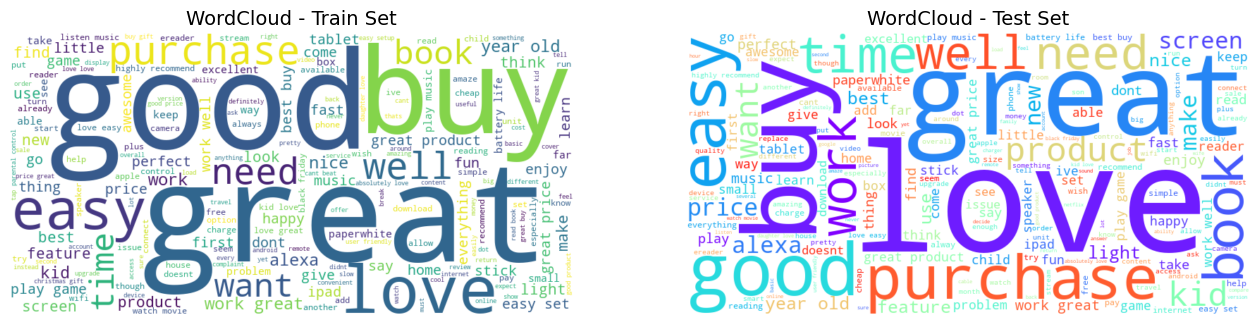

In [48]:
texto_entrenamiento = " ".join(corpus_entrenamiento_normalizado)
texto_prueba = " ".join(corpus_prueba_normalizado)

wc_train = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(texto_entrenamiento)
wc_test = WordCloud(width=800, height=400, background_color="white", colormap="rainbow").generate(texto_prueba)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.imshow(wc_train, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Train Set", fontsize=14)

plt.subplot(1,2,2)
plt.imshow(wc_test, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Test Set", fontsize=14)

plt.show()

In [49]:
vectorizer = TfidfVectorizer(
    norm= 'l2',
    smooth_idf= True,
    use_idf= True,
    ngram_range= (1,2), 
    max_df= 0.90,
    min_df= 2)

tfidf_matrix_entrenamiento = vectorizer.fit_transform(corpus_entrenamiento_normalizado)
tfidf_matrix_prueba = vectorizer.transform(corpus_prueba_normalizado)


In [50]:
np.unique(y_prueba)

array(['Negativo', 'Neutro', 'Positivo'], dtype=object)

In [51]:
def evaluacion_modelos(y_real, y_pred):
    
    labels = ['Negativo', 'Neutro', 'Positivo']

    print(f'Accuracy: {round(accuracy_score(y_real, y_pred),2)}')
    print(f'Precision: {round(precision_score(y_real, y_pred, average= "weighted"),2)}')
    print(f'F1-Score: {round(f1_score(y_real, y_pred, average= "weighted"),2)}')
    print(f'Recall: {round(recall_score(y_real, y_pred, average= "weighted"),2)}')
    
    matriz_confusion_modelo = confusion_matrix(y_real, y_pred, normalize= "true")
    visualizacion_matriz_confusion = ConfusionMatrixDisplay(matriz_confusion_modelo, display_labels= labels)
    visualizacion_matriz_confusion.plot();
    print(classification_report(y_real, y_pred, target_names= labels))


In [52]:
tfidf_matrix_entrenamiento.shape, tfidf_matrix_prueba.shape

((27700, 42533), (6926, 42533))

In [53]:
modelo_lr = LogisticRegression(
    max_iter= 1000,
    random_state= 42,
    class_weight= 'balanced')

modelo_lr.fit(tfidf_matrix_entrenamiento, y_entrenamiento)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [54]:
y_pred_lr = modelo_lr.predict(tfidf_matrix_prueba)
y_proba_lr = modelo_lr.predict_proba(tfidf_matrix_prueba)

Accuracy: 0.87
Precision: 0.92
F1-Score: 0.89
Recall: 0.87
              precision    recall  f1-score   support

    Negativo       0.29      0.51      0.37       162
      Neutro       0.17      0.34      0.22       300
    Positivo       0.97      0.90      0.94      6464

    accuracy                           0.87      6926
   macro avg       0.48      0.58      0.51      6926
weighted avg       0.92      0.87      0.89      6926



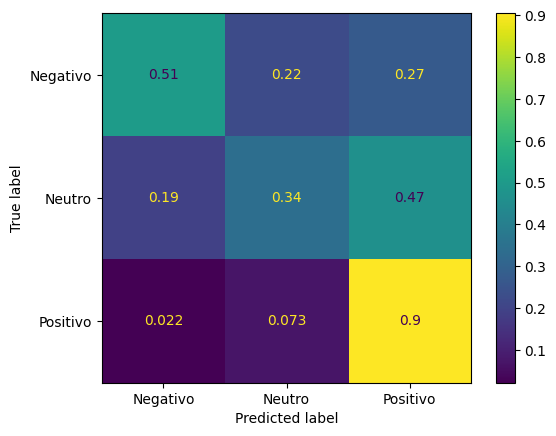

In [55]:
evaluacion_modelos(y_prueba,y_pred_lr)

In [56]:
modelo_nb = MultinomialNB(alpha = 1.0)
modelo_nb.fit(tfidf_matrix_entrenamiento,y_entrenamiento)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [57]:
y_pred_nb = modelo_nb.predict(tfidf_matrix_prueba)

Accuracy: 0.93
Precision: 0.87
F1-Score: 0.9
Recall: 0.93
              precision    recall  f1-score   support

    Negativo       0.00      0.00      0.00       162
      Neutro       0.00      0.00      0.00       300
    Positivo       0.93      1.00      0.97      6464

    accuracy                           0.93      6926
   macro avg       0.31      0.33      0.32      6926
weighted avg       0.87      0.93      0.90      6926



C:\Users\erik-\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\erik-\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\erik-\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

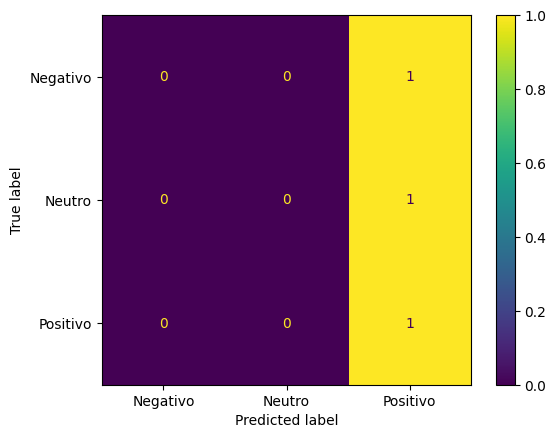

In [58]:
evaluacion_modelos(y_prueba,y_pred_nb)

In [59]:
modelos = {
    'Logistic Regression': y_pred_lr,
    'Naive Bayes': y_pred_nb
}

resultados = []

for nombre, pred in modelos.items():
    acc = accuracy_score(y_prueba, pred)
    prec = precision_score(y_prueba, pred, average='weighted')
    rec = recall_score(y_prueba, pred, average='weighted')
    f1 = f1_score(y_prueba, pred, average='weighted')
    
    resultados.append({
        'Modelo': nombre,
        'Exactitud': round(acc, 3),
        'Precisión': round(prec, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3)
    })

tabla_resultados = pd.DataFrame(resultados)

tabla_resultados.sort_values(by='Exactitud', ascending=False, inplace=True)
display(tabla_resultados)

C:\Users\erik-\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Modelo,Exactitud,Precisión,Recall,F1 Score
1,Naive Bayes,0.933,0.871,0.933,0.901
0,Logistic Regression,0.871,0.919,0.871,0.892


In [61]:
# Obtener coeficientes
feature_names = np.array(vectorizer.get_feature_names_out())
clases = modelo_lr.classes_

for i, clase in enumerate(clases):
    print(f"\n{'='*30}")
    print(f"SENTIMIENTO: {clase}")
    print(f"{'='*30}")
    
    # Top 15 palabras más importantes
    coefs = modelo_lr.coef_[i]
    top_indices = np.argsort(coefs)[-15:][::-1]
    top_features = feature_names[top_indices]
    top_coefs = coefs[top_indices]
    
    for feature, coef in zip(top_features, top_coefs):
        print(f"{feature:20s}: {coef:.4f}")


SENTIMIENTO: Negativo
return              : 5.1661
disappointed        : 3.8407
never               : 3.6381
slow                : 3.3190
back                : 2.9540
way                 : 2.8818
charger             : 2.8539
didnt               : 2.7906
minute              : 2.6770
try                 : 2.5623
waste               : 2.5549
useless             : 2.5382
plug ready          : 2.5069
wantedto            : 2.4895
work must           : 2.4823

SENTIMIENTO: Neutro
decent              : 3.5222
sure                : 2.9960
starter             : 2.7398
okay                : 2.6950
figure              : 2.5690
shop best           : 2.3841
buy travel          : 2.2957
gift dont           : 2.2683
amazon              : 2.2419
rate                : 2.2318
hopefully           : 2.1913
dy                  : 2.1854
excellent product   : 2.1413
good                : 2.0887
average             : 2.0625

SENTIMIENTO: Positivo
love                : 5.2905
great               : 4.9497
easy 

In [62]:
# Función para predecir
def predecir_sentimiento(texto, modelo=modelo_lr, vectorizer=vectorizer):
    # Vectorizar
    texto_tfidf = vectorizer.transform([texto])
    
    # Predecir
    prediccion = modelo.predict(texto_tfidf)[0]
    probabilidades = modelo.predict_proba(texto_tfidf)[0]
    
    # Crear resultado
    resultado = {
        'texto': texto,
        'sentimiento': prediccion,
        'probabilidad': max(probabilidades),
        'probabilidades_detalle': dict(zip(modelo.classes_, probabilidades))
    }
    
    return resultado

In [63]:
test_texts = [
    "I am not happy with the service, my issue is still unresolved.",
    "Great service today, the support agent was very helpful.",
    "I am not satisfied with this response.",
    "Okay service, nothing special.",
    "Not bad at all, the issue was fixed quickly."
]


for text in test_texts:
    resultado = predecir_sentimiento(text)
    print(f"\nTexto: {resultado['texto']}")
    print(f"Predicción: {resultado['sentimiento']}")
    print(f"Confianza: {resultado['probabilidad']:.2%}")
    print(f"Probabilidades: {resultado['probabilidades_detalle']}")
    print("-" * 60)


Texto: I am not happy with the service, my issue is still unresolved.
Predicción: Positivo
Confianza: 87.64%
Probabilidades: {'Negativo': np.float64(0.07631805637923378), 'Neutro': np.float64(0.04724511737054442), 'Positivo': np.float64(0.8764368262502218)}
------------------------------------------------------------

Texto: Great service today, the support agent was very helpful.
Predicción: Positivo
Confianza: 86.34%
Probabilidades: {'Negativo': np.float64(0.06779813732897486), 'Neutro': np.float64(0.06882176711289133), 'Positivo': np.float64(0.8633800955581339)}
------------------------------------------------------------

Texto: I am not satisfied with this response.
Predicción: Positivo
Confianza: 87.46%
Probabilidades: {'Negativo': np.float64(0.07630651490811369), 'Neutro': np.float64(0.0491151153070129), 'Positivo': np.float64(0.8745783697848735)}
------------------------------------------------------------

Texto: Okay service, nothing special.
Predicción: Neutro
Confianza: 80